In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Table1_CustDetails.csv')

In [5]:
df.shape

(7049, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


**Step 1: Understand your data?**
- Data format?
- Missing data?
- Outliers?

**Step 2: What is my aim?**

- Discover drivers of Churn?
- Why do we care about the Churn?

**Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)**

- Higher monthly charges leads to higher churn?
- Monthly service type?
- More the services, less the churn?
- Exploratory question?
    - How is churn differnt by service type?
    - How is churn different by Contract type?
    - How is churn different by payment type?

In [9]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [10]:
# Dropping null values

df = df.dropna()

In [12]:
df.shape

(7038, 13)

In [56]:
# current churn rate
df.groupby('churn').churn.value_counts()

churn  churn
No     No       5168
Yes    Yes      1870
Name: churn, dtype: int64

In [60]:
churn_rate = 1870/7038
print(churn_rate*100,'%')

26.570048309178745 %


In [14]:
## Does internet service type drive churn?

df['internet_service'] = df.internet_service.replace([0, 1, 2], ['No_Internet', 'DSL', 'Fiber'])

In [15]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,DSL,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,DSL,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.9,267.40,Yes,3.2


In [22]:
df.internet_service.value_counts()

Fiber          3098
DSL            2417
No_Internet    1523
Name: internet_service, dtype: int64

In [16]:
df.groupby('churn').internet_service.value_counts()

churn  internet_service
No     DSL                 1957
       Fiber               1801
       No_Internet         1410
Yes    Fiber               1297
       DSL                  460
       No_Internet          113
Name: internet_service, dtype: int64

In [19]:
internet_service_type = pd.crosstab(df.internet_service, df.churn,normalize = 'index')

In [21]:
internet_service_type

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber,0.581343,0.418657
No_Internet,0.925804,0.074196


<AxesSubplot:xlabel='internet_service'>

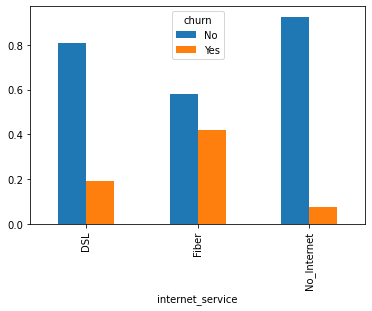

In [25]:
internet_service_type.plot(kind='bar')

In [ ]:
# Fiber Optic has a higher possibility of churn out of all three internet types

------------------------------------

In [30]:
# Does phone service types drive churn?

df.phone_service=df.phone_service.replace([0, 1, 2], ['No_Phone', '1 line', '2 or more lines'])

In [37]:
df.groupby('phone_service').phone_service.value_counts()

phone_service    phone_service  
1 line           1 line             3390
2 or more lines  2 or more lines    2967
No_Phone         No_Phone            681
Name: phone_service, dtype: int64

In [33]:
phone_service_type=pd.crosstab(df.phone_service, df.churn, normalize = "index")

In [34]:
phone_service_type

churn,No,Yes
phone_service,,
1 line,0.749558,0.250442
2 or more lines,0.713515,0.286485
No_Phone,0.748899,0.251101


In [38]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1 line,DSL,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2 or more lines,DSL,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1 line,Fiber,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1 line,Fiber,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1 line,Fiber,0,Mailed check,83.9,267.40,Yes,3.2


In [ ]:
# Phone service type doesn't make a big difference in churn

------------------------------------

<Figure size 720x720 with 0 Axes>

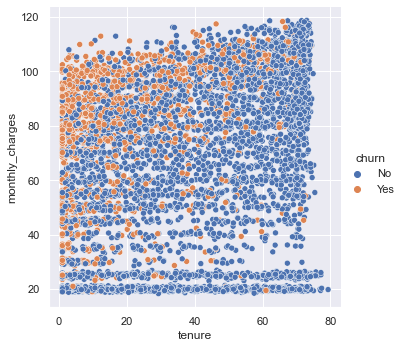

In [78]:
# monthly_charges and tenure

plt.figure(figsize=(10,10)) 
sns.relplot(data = df, x= 'tenure', y='monthly_charges', hue='churn')

In [47]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

In [49]:
df.contract_type.value_counts()

0    3876
2    1687
1    1475
Name: contract_type, dtype: int64

In [64]:
contract_type_churn = pd.crosstab(df.contract_type, df.churn,normalize = 'index')
contract_type_churn

churn,No,Yes
contract_type,,
0,0.572755,0.427245
1,0.887458,0.112542
2,0.971547,0.028453


<AxesSubplot:xlabel='contract_type'>

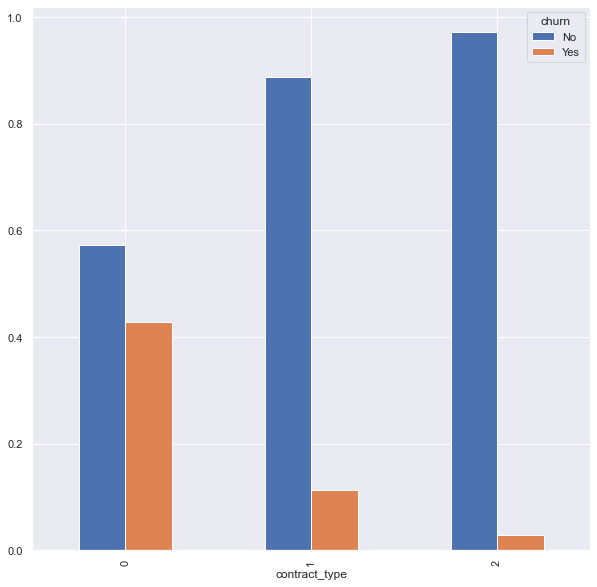

In [71]:
contract_type_churn.plot(kind='bar')

In [76]:
df['churn_bol'] = df.churn.replace(['No', "Yes"], [0,1])

In [81]:
df_1 = pd.pivot_table(data = df, index = 'internet_service', columns = 'contract_type', values = 'churn_bol')

In [82]:
df_1

contract_type,0,1,2
internet_service,,,
DSL,0.322712,0.092982,0.019262
Fiber,0.546053,0.192237,0.072261
No_Internet,0.188931,0.024725,0.007874
